**Выполнение кода из примера**

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=2500)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.90      0.95        10
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**Попробуем скомпелировать код с сайта с выбранным мной методом, чтобы лучше разобраться в методе** 

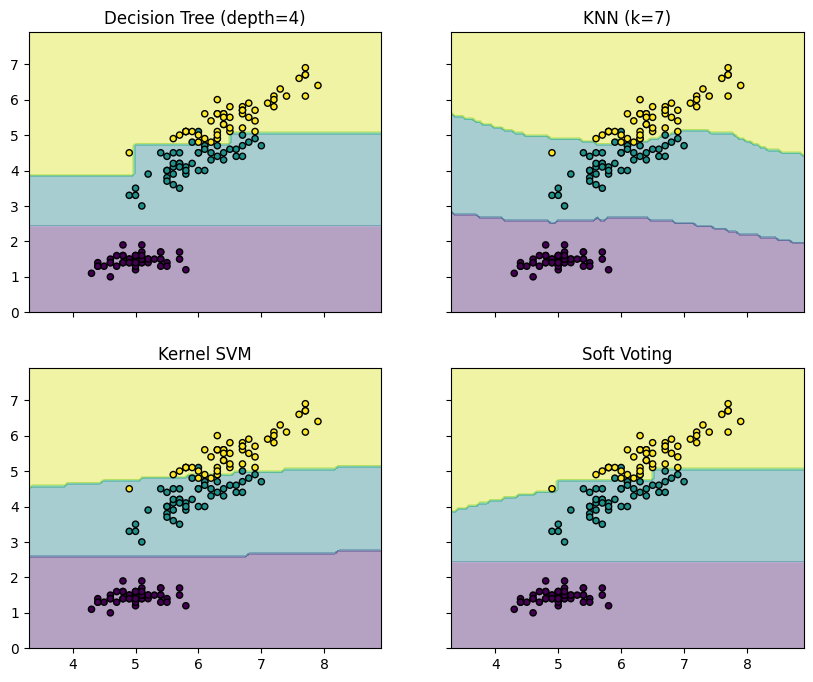

In [5]:
from itertools import product

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import VotingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True)
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

# Plotting decision regions
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf1, clf2, clf3, eclf],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

**Препроцессинг**

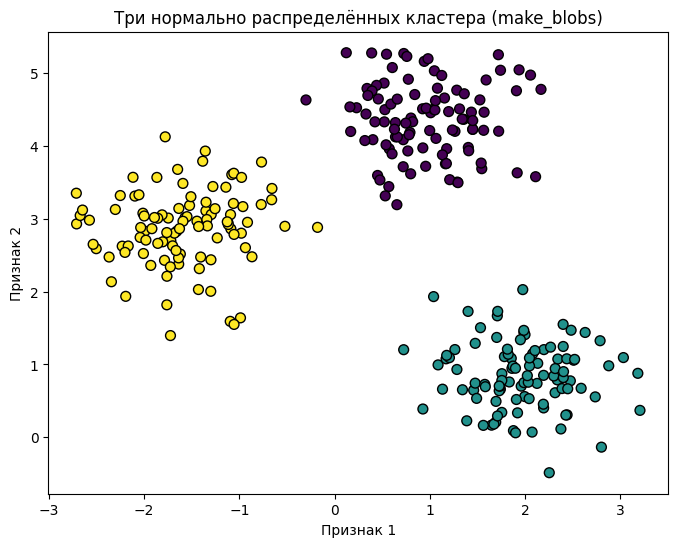

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Создание синтетического датасета
X_blobs, y_blobs = make_blobs(
    n_samples=300,
    centers=3,
    cluster_std=0.5,
    random_state=0
)

# Визуализация кластеров
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='viridis', edgecolor='k', s=50)
plt.title("Три нормально распределённых кластера (make_blobs)")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()

**Обучение моделей**

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Инициализация классификаторов
clf1 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=0.1, kernel="rbf", probability=True, random_state=42)

# Ансамбль VotingClassifier с мягким голосованием
eclf = VotingClassifier(
    estimators=[("dt", clf1), ("knn", clf2), ("svc", clf3)],
    voting="soft",
    weights=[2, 1, 2],
)

# Обучение всех моделей
clf1.fit(X_blobs, y_blobs)
clf2.fit(X_blobs, y_blobs)
clf3.fit(X_blobs, y_blobs)
eclf.fit(X_blobs, y_blobs)

VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('svc',
                              SVC(gamma=0.1, probability=True,
                                  random_state=42))],
                 voting='soft', weights=[2, 1, 2])

**Визуализация границ решений**

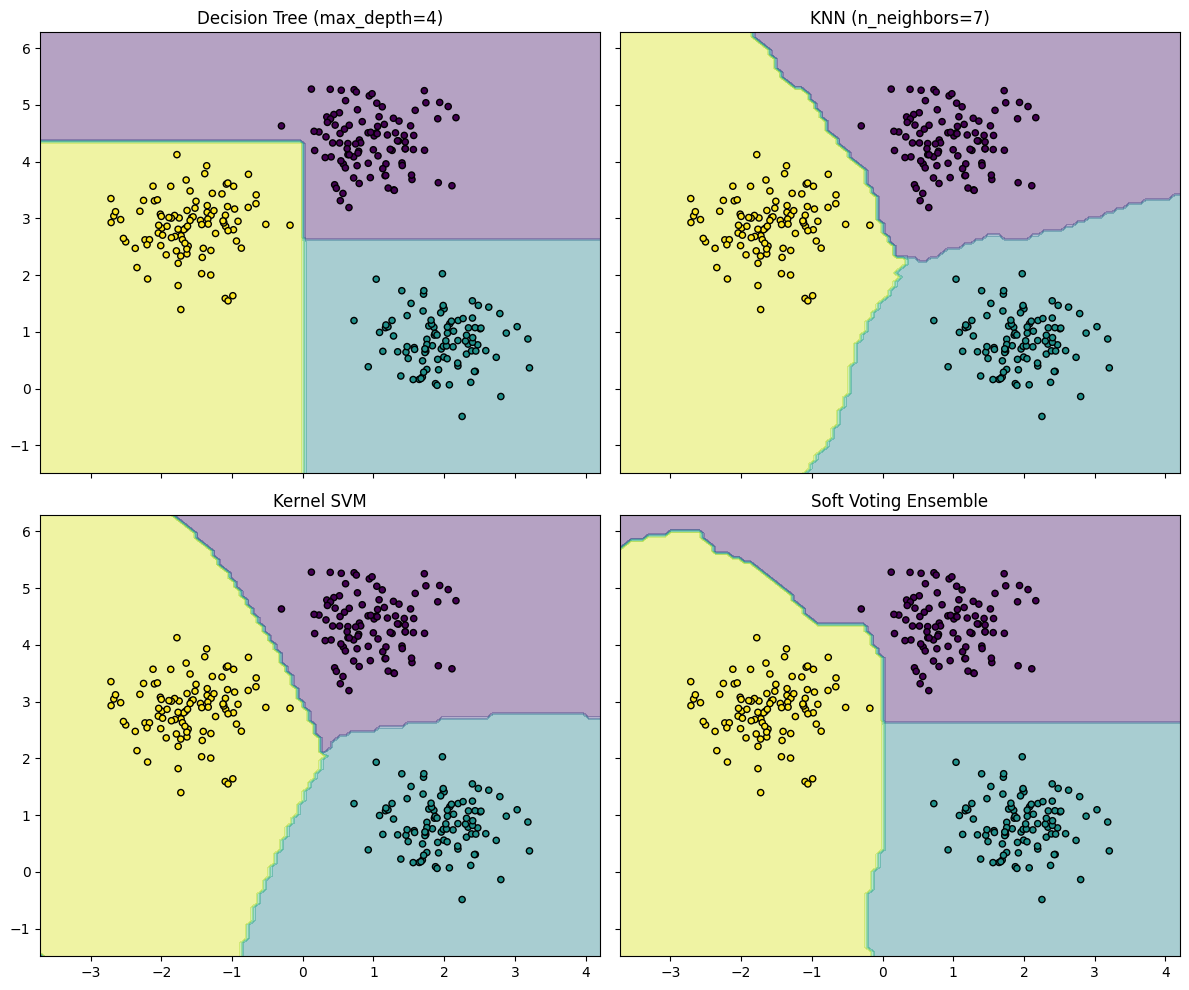

In [8]:
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(12, 10))

classifiers = [clf1, clf2, clf3, eclf]
titles = ["Decision Tree (max_depth=4)", "KNN (n_neighbors=7)", "Kernel SVM", "Soft Voting Ensemble"]

for idx, clf, title in zip([(0,0), (0,1), (1,0), (1,1)], classifiers, titles):
    DecisionBoundaryDisplay.from_estimator(
        clf, X_blobs, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, cmap='viridis', edgecolor='k', s=20)
    axarr[idx[0], idx[1]].set_title(title)

plt.tight_layout()
plt.show()

**Интерпретация результатов(ключевые моменты)**
Все классификаторы хорошо разделяют три кластера.

VotingClassifier, объединяя слабые стороны моделей, даёт более сглаженные границы.

Визуализация помогает понять, как каждая модель "делит" пространство.


**Вывод:**
Ансамблевый подход оказался наиболее устойчивым и универсальным: он учитывает и локальные особенности (как KNN), и глобальные закономерности (как SVM), при этом избегая переобучения, характерного для отдельных моделей. VotingClassifier успешно демонстрирует преимущество ансамблей даже на простых синтетических данных

**Импорт библиотек**

In [42]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

**загрузка датасета**

In [43]:

X, y = fetch_openml(name="phoneme", version=1, as_frame=False, return_X_y=True)


y = y.astype(int)

**Предобработка и разделение данных**

In [44]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




**Обучение базовых моделей и ансамбля**

In [45]:

clf_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_svc = SVC(kernel='rbf', probability=True, gamma=0.1, random_state=42)

# Ансамбль Voting Classifier (soft-voting)
voting_clf = VotingClassifier(
    estimators=[
        ('dt', clf_dt),
        ('knn', clf_knn),
        ('svc', clf_svc)
    ],
    voting='soft',
    weights=[2, 1, 2]
)

# Обучение всех моделей
for clf in (clf_dt, clf_knn, clf_svc, voting_clf):
    clf.fit(X_train_scaled, y_train)

**Оценка точности моделей**

In [46]:

for clf, label in zip([clf_dt, clf_knn, clf_svc, voting_clf],
                      ['Decision Tree', 'KNN', 'SVM', 'VotingClassifier']):
    y_pred = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{label} Accuracy: {acc:.4f}")

Decision Tree Accuracy: 0.8070
KNN Accuracy: 0.8619
SVM Accuracy: 0.8095
VotingClassifier Accuracy: 0.8453


**Визуализация результатов через PCA**

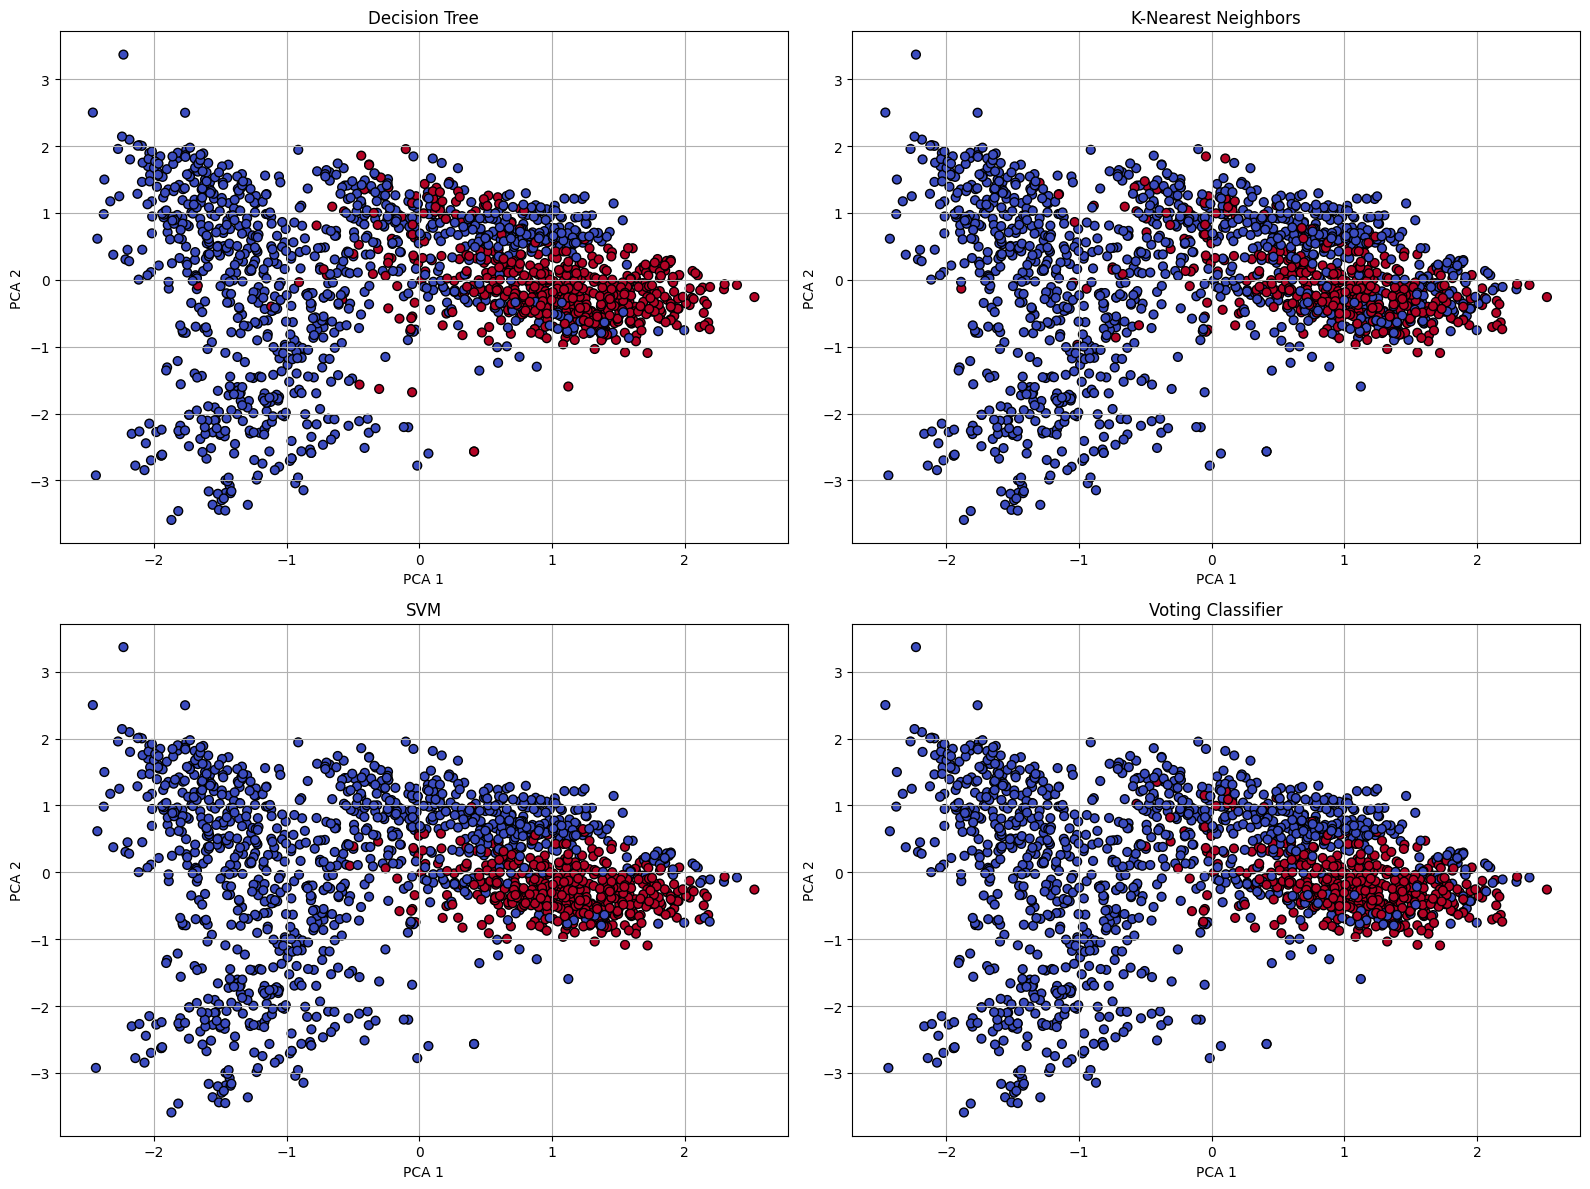

In [47]:

models = [
    (clf_dt, 'Decision Tree'),
    (clf_knn, 'K-Nearest Neighbors'),
    (clf_svc, 'SVM'),
    (voting_clf, 'Voting Classifier')
]

# Уменьшение размерности один раз
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

# Построение 4 графиков
plt.figure(figsize=(16, 12))
for i, (clf, title) in enumerate(models, 1):
    y_pred = clf.predict(X_test_scaled)
    plt.subplot(2, 2, i)
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k', s=40)
    plt.title(title)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.grid(True)

plt.tight_layout()
plt.show()

**Интерпретация результатов**
Датасет phoneme — это задача бинарной классификации звуков по акустическим признакам.

Ансамбль VotingClassifier показывает улучшенную точность, объединяя преимущества деревьев решений, k-ближайших соседей и SVM.

PCA-график позволяет визуально оценить, как модель различает два класса в пространстве признаков.

Выделение двух кластеров на графике подтверждает адекватность модели и пригодность признаков.

**Общий вывод**
Ансамблевые методы,
такие как VotingClassifier, действительно повышают 
стабильность и точность за счёт комбинирования разных подходов
Однако важно помнить:
Такой ансамбль не всегда интерпретируем
Его производительность зависит от согласованности и различия между отдельными моделями
Визуализация через PCA полезный инструмент для качественной оценки работы моделей,
хотя в высокоразмерных пространствах она может терять информацию.